<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Sleep_Stage_XAI_25_05_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Function

In [2]:
!pip install imbalanced-learn
from tqdm.notebook import tqdm
from imblearn.over_sampling import SMOTE
import statistics as st

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)



def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys


def Search_Some(dataset,some):
  dic={}
  for col in tqdm(list(dataset.columns)):
    rows = []
    flage = 0
    for row in range(dataset.shape[0]):
      if str(dataset[col][row]) == some:
        rows.append(row)
        flage = 1
    if flage ==1:
      dic[col] = rows

  return dic






def find_stat_classwise(dataframe,col,target_col,temp_tar,stat_type='median'):
  print("Calculating-",col,"|| Target-",temp_tar)
  list_1 = []
  for row in range(dataframe.shape[0]):
      if str(dataframe[col][row]) != 'nan' and str(dataframe[target_col][row]) == temp_tar:
        list_1.append(dataframe[col][row])

  try:
    if stat_type == 'median':
      return st.median(list_1)
    elif stat_type == 'mean':
      return st.mean(list_1)
    elif stat_type == 'mode':
      return st.mode(list_1)

  except:
    print("No Class exist")
    return 'nan'



def clsswise_null_rmv(df,target_cls,stat_type='median'):

  cls = list(set(df[target_cls]))

  refine = []
  print("Processing Null Dictionary.....")
  d_null = Search_Some(df,'nan')

  print("Replacing Nan vlues with ",stat_type,".....")
  for col in tqdm(d_null):
    for c in cls:
      m = find_stat_classwise(df,col,target_cls,c,stat_type)
      refine.append([col,c,m])

  for i in refine:
    print(i)
    for row in tqdm(range(df.shape[0])):
      if str(df[i[0]][row]) == 'nan' and str(df[target_cls][row]) == i[1]:
        df.at[row,i[0]] = i[2]

  return df

#Starting

In [11]:
import numpy as np
import pandas as pd

dataset=pd.read_csv("/content/HMC_SleepStage_2023.04.30.csv")

#dataset=pd.read_excel("/content/drive/MyDrive/Sleep Stage 5 class/HMC_SleepStage_2023.04.30.xlsx")

#dataset = pd.read_excel("/content/drive/MyDrive/Publications/Sleep Stage XAI/HMC_SleepStage_2023.04.30.xlsx")

target = "Sleep_Stage"
result = {}

<ipython-input-11-300e27999d7e>:4: DtypeWarning: Columns (89,96,97,98,102) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv("/content/HMC_SleepStage_2023.04.30.csv")


In [13]:
dataset.shape

(108451, 104)

In [18]:
dataset[target].value_counts()

N2    39428
N3    21290
W     19355
R     16465
N1    11913
Name: Sleep Stage, dtype: int64

#Replacing Value

In [19]:
#just change the dictionary

chng_cls = {
    "N1": "LightSleep",

    "N2": "LightSleep",

    "N3": "DeepSleep",

    "R": "REM",

    "W": "WAKE"
}

dataset = dataset.replace(["N1","N2","N3","R","W"],[chng_cls['N1'],chng_cls['N2'],chng_cls['N3'],chng_cls['R'],chng_cls['W']])

In [20]:
dataset[target].value_counts()

LightSleep    51341
DeepSleep     21290
WAKE          19355
REM           16465
Name: Sleep Stage, dtype: int64

#Removing a class

In [21]:
rmv_cls = ["WAKE","REM"]


for i in rmv_cls:
  dataset.drop(dataset.index[dataset[target] == i], inplace=True)
  dataset.reset_index(drop=True)

In [22]:
dataset[target].value_counts()

LightSleep    51341
DeepSleep     21290
Name: Sleep Stage, dtype: int64

#Replacing null values with median

In [ ]:
dataset = clsswise_null_rmv(dataset,target,'median')

Processing Null Dictionary.....


  0%|          | 0/104 [00:00<?, ?it/s]

Replacing Nan vlues with  median .....


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating- RelativePower_Delta_C4 || Target- LightSleep
Calculating- RelativePower_Delta_C4 || Target- Wake
Calculating- RelativePower_Delta_C4 || Target- REM
Calculating- RelativePower_Delta_C4 || Target- DeepSleep
Calculating- DAR || Target- LightSleep
Calculating- DAR || Target- Wake
Calculating- DAR || Target- REM
Calculating- DAR || Target- DeepSleep
Calculating- DTR || Target- LightSleep
Calculating- DTR || Target- Wake
Calculating- DTR || Target- REM
Calculating- DTR || Target- DeepSleep
Calculating- DTABR || Target- LightSleep
Calculating- DTABR || Target- Wake
Calculating- DTABR || Target- REM
Calculating- DTABR || Target- DeepSleep
Calculating- RelativePower_Delta || Target- LightSleep
Calculating- RelativePower_Delta || Target- Wake
Calculating- RelativePower_Delta || Target- REM
Calculating- RelativePower_Delta || Target- DeepSleep
['RelativePower_Delta_C4', 'LightSleep', 0.058773185]


  0%|          | 0/108451 [00:00<?, ?it/s]

['RelativePower_Delta_C4', 'Wake', 0.0175453205]


  0%|          | 0/108451 [00:00<?, ?it/s]

['RelativePower_Delta_C4', 'REM', 0.024598]


  0%|          | 0/108451 [00:00<?, ?it/s]

['RelativePower_Delta_C4', 'DeepSleep', 0.452874699]


  0%|          | 0/108451 [00:00<?, ?it/s]

['DAR', 'LightSleep', 4.7886401549999995]


  0%|          | 0/108451 [00:00<?, ?it/s]

['DAR', 'Wake', 2.744560977]


  0%|          | 0/108451 [00:00<?, ?it/s]

['DAR', 'REM', 4.03255562]


  0%|          | 0/108451 [00:00<?, ?it/s]

['DAR', 'DeepSleep', 14.56382933]


  0%|          | 0/108451 [00:00<?, ?it/s]

['DTR', 'LightSleep', 2.9583171850000003]


  0%|          | 0/108451 [00:00<?, ?it/s]

['DTR', 'Wake', 2.7302343665]


  0%|          | 0/108451 [00:00<?, ?it/s]

['DTR', 'REM', 2.494670008]


  0%|          | 0/108451 [00:00<?, ?it/s]

['DTR', 'DeepSleep', 6.96341025]


  0%|          | 0/108451 [00:00<?, ?it/s]

['DTABR', 'LightSleep', 3.427473455]


  0%|          | 0/108451 [00:00<?, ?it/s]

['DTABR', 'Wake', 1.6326299305]


  0%|          | 0/108451 [00:00<?, ?it/s]

['DTABR', 'REM', 2.944142552]


  0%|          | 0/108451 [00:00<?, ?it/s]

['DTABR', 'DeepSleep', 9.939345058]


  0%|          | 0/108451 [00:00<?, ?it/s]

['RelativePower_Delta', 'LightSleep', 0.452663739]


  0%|          | 0/108451 [00:00<?, ?it/s]

['RelativePower_Delta', 'Wake', 0.3495070895]


  0%|          | 0/108451 [00:00<?, ?it/s]

['RelativePower_Delta', 'REM', 0.414870717]


  0%|          | 0/108451 [00:00<?, ?it/s]

['RelativePower_Delta', 'DeepSleep', 0.687834151]


  0%|          | 0/108451 [00:00<?, ?it/s]

In [ ]:
dataset[target].value_counts()

LightSleep    51341
DeepSleep     21290
Wake          19355
REM           16465
Name: Sleep_Stage, dtype: int64

#Label Encoding

In [ ]:
set(list(dataset[target]))

{'DeepSleep', 'LightSleep', 'REM', 'Wake'}

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [ ]:
set(list(dataset[target]))

{0, 1, 2, 3}

###Spliting into X and y

In [ ]:
X =  dataset.loc[:,dataset.columns != target]  # removing Sleep Stage
X =  X.loc[:,X.columns != "Subject"]            # removing Subject
X =  X.loc[:,X.columns != "Epoch"]             # removing Epoch
y = dataset[target]

#Feature Selection

In [ ]:
number_of_feat = 20

###ANOVA with f classifciation

In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd



fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_ANOVA']

lyst = featureScores.nlargest(number_of_feat,'Score_ANOVA')

#lyst.to_csv('Filter_Method_ANOVA_with_f_classif.csv')

list_of_feat1 = list(lyst["Best_columns"])

In [ ]:
imp=featureScores.nlargest(number_of_feat,'Score_ANOVA')
print(imp)

              Best_columns   Score_ANOVA
84   RelativePower_Beta_C4  14683.969657
97      RelativePower_Beta  14257.413235
89   RelativePower_Beta_O2  11719.561497
79   RelativePower_Beta_F4  11104.890377
83  RelativePower_Alpha_C4   7972.217079
96     RelativePower_Alpha   7845.724645
81  RelativePower_Delta_F4   7687.221914
88  RelativePower_Alpha_O2   7179.096018
91  RelativePower_Delta_O2   6861.198080
78  RelativePower_Alpha_F4   5795.495955
85  RelativePower_Theta_C4   3959.199908
2           MeanF_Alpha_F4   3560.103300
3    SpectralEdge_Alpha_F4   3407.770611
80  RelativePower_Theta_F4   3349.754081
98     RelativePower_Theta   3266.158533
90  RelativePower_Theta_O2   1702.566570
27          MeanF_Alpha_C4   1501.938367
28   SpectralEdge_Alpha_C4   1494.393099
82  RelativePower_Gamma_F4   1276.867075
51        MedianF_Alpha_O2   1268.283321


In [ ]:
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])

###All features

In [ ]:
list_of_feat2 = list(X.columns)

#Data Spliting to X_new and y_new

In [ ]:
X_new = dataset[list_of_feat]
y_new = dataset[target]


#Scaling

In [ ]:
X_new

,RelativePower_Beta_C4,RelativePower_Beta,RelativePower_Beta_O2,RelativePower_Beta_F4,RelativePower_Alpha_C4,RelativePower_Alpha,RelativePower_Delta_F4,RelativePower_Alpha_O2,RelativePower_Delta_O2,RelativePower_Alpha_F4,RelativePower_Theta_C4,MeanF_Alpha_F4,SpectralEdge_Alpha_F4,RelativePower_Theta_F4,RelativePower_Theta,RelativePower_Theta_O2,MeanF_Alpha_C4,SpectralEdge_Alpha_C4,RelativePower_Gamma_F4,MedianF_Alpha_O2
0,0.187500,0.172551,0.168642,0.161512,0.131944,0.120955,0.546392,0.114082,0.555528,0.116838,0.166667,17.85756,17.48293,0.140893,0.143854,0.124002,18.48195,17.73268,0.034364,10.61463
1,0.212625,0.199317,0.200980,0.184346,0.136213,0.138362,0.491589,0.144454,0.439643,0.134419,0.169435,17.60780,17.10829,0.153622,0.164211,0.169577,19.60585,18.98146,0.036024,10.36488
2,0.141290,0.157235,0.176206,0.154208,0.129265,0.133291,0.491996,0.142102,0.437674,0.128506,0.234481,17.60780,16.98341,0.190924,0.210010,0.204627,17.35805,16.60878,0.034366,9.74049
3,0.190828,0.160948,0.168615,0.123400,0.166975,0.153543,0.592804,0.162995,0.460881,0.130659,0.175920,15.98439,15.48488,0.140337,0.167245,0.185477,17.10829,16.60878,0.012800,9.49073
4,0.122178,0.111131,0.152106,0.059108,0.113015,0.101463,0.797956,0.132266,0.555519,0.059108,0.128287,16.48390,15.98439,0.076492,0.114553,0.138880,17.10829,16.35902,0.007336,9.99024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108446,0.224000,0.228411,0.230617,0.230617,0.164000,0.183812,0.322863,0.193718,0.322863,0.193718,0.164000,17.10829,16.35902,0.207555,0.193037,0.207555,17.73268,17.23317,0.045247,9.99024
108447,0.173796,0.172402,0.171705,0.171705,0.159313,0.152512,0.478966,0.149112,0.478966,0.149112,0.197934,16.60878,16.10927,0.176223,0.183460,0.176223,16.35902,15.98439,0.023993,10.48976
108448,0.310345,0.297587,0.291209,0.291209,0.169761,0.173803,0.291209,0.175824,0.291209,0.175824,0.143236,18.73171,18.48195,0.153846,0.150309,0.153846,19.73073,19.48098,0.087912,10.48976
108449,0.163743,0.124219,0.104457,0.104457,0.119883,0.087315,0.707521,0.071031,0.707521,0.071031,0.125731,17.85756,17.48293,0.083565,0.097621,0.083565,17.48293,16.85854,0.033426,10.11512


In [ ]:
from sklearn.preprocessing import normalize
X_new = normalize(X_new)



pd.DataFrame(X_new)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.005022,0.004621,0.004517,0.004326,0.003534,0.003239,0.014634,0.003055,0.014878,0.003129,0.004464,0.478269,0.468236,0.003773,0.003853,0.003321,0.494992,0.474925,0.000920,0.284286
1,0.005573,0.005224,0.005268,0.004832,0.003570,0.003627,0.012885,0.003786,0.011523,0.003523,0.004441,0.461509,0.448417,0.004027,0.004304,0.004445,0.513879,0.497514,0.000944,0.271669
2,0.003963,0.004410,0.004942,0.004325,0.003625,0.003738,0.013799,0.003985,0.012275,0.003604,0.006576,0.493837,0.476325,0.005355,0.005890,0.005739,0.486833,0.465818,0.000964,0.273187
3,0.005616,0.004736,0.004962,0.003631,0.004914,0.004518,0.017445,0.004796,0.013562,0.003845,0.005177,0.470378,0.455678,0.004130,0.004922,0.005458,0.503451,0.488752,0.000377,0.279287
4,0.003544,0.003224,0.004412,0.001715,0.003278,0.002943,0.023147,0.003837,0.016114,0.001715,0.003721,0.478159,0.463670,0.002219,0.003323,0.004029,0.496271,0.474537,0.000213,0.289793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108446,0.006280,0.006404,0.006466,0.006466,0.004598,0.005153,0.009052,0.005431,0.009052,0.005431,0.004598,0.479645,0.458639,0.005819,0.005412,0.005819,0.497151,0.483146,0.001269,0.280085
108447,0.005082,0.005042,0.005021,0.005021,0.004659,0.004460,0.014007,0.004361,0.014007,0.004361,0.005788,0.485703,0.471096,0.005153,0.005365,0.005153,0.478399,0.467444,0.000702,0.306760
108448,0.007827,0.007506,0.007345,0.007345,0.004282,0.004384,0.007345,0.004435,0.007345,0.004435,0.003613,0.472438,0.466138,0.003880,0.003791,0.003880,0.497634,0.491335,0.002217,0.264565
108449,0.004511,0.003422,0.002877,0.002877,0.003302,0.002405,0.019490,0.001957,0.019490,0.001957,0.003463,0.491912,0.481592,0.002302,0.002689,0.002302,0.481592,0.464392,0.000921,0.278635


#Spliting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)



---



#USing SMOTE for balancing

In [ ]:
#new_dataset =  balance(X,y)
smote = SMOTE()
X_train, y_train= smote.fit_resample(X_train, y_train)

# **Training**

#ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[3352  560  227  126]
 [2387 3549 2790 1472]
 [ 268  638 2097  398]
 [ 115  359  475 2878]]
              precision    recall  f1-score   support

           0       0.55      0.79      0.65      4265
           1       0.70      0.35      0.46     10198
           2       0.38      0.62      0.47      3401
           3       0.59      0.75      0.66      3827

    accuracy                           0.55     21691
   macro avg       0.55      0.63      0.56     21691
weighted avg       0.60      0.55      0.53     21691

Accurecy:  0.547508183117422


#Graddient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[3465  573  160   67]
 [1714 4644 2492 1348]
 [ 110  548 2450  293]
 [  74  265  297 3191]]
              precision    recall  f1-score   support

           0       0.65      0.81      0.72      4265
           1       0.77      0.46      0.57     10198
           2       0.45      0.72      0.56      3401
           3       0.65      0.83      0.73      3827

    accuracy                           0.63     21691
   macro avg       0.63      0.71      0.65     21691
weighted avg       0.68      0.63      0.63     21691

Accurecy:  0.6339034622654557


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[3442  702   75   46]
 [1092 6449 1533 1124]
 [  50  694 2476  181]
 [  35  358  143 3291]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.77      4265
           1       0.79      0.63      0.70     10198
           2       0.59      0.73      0.65      3401
           3       0.71      0.86      0.78      3827

    accuracy                           0.72     21691
   macro avg       0.71      0.76      0.73     21691
weighted avg       0.73      0.72      0.72     21691

Accurecy:  0.7218662117929096


1/25 round completed......................... Accurecy: 0.5891383523120188
2/25 round completed......................... Accurecy: 0.6003411553178738
3/25 round completed......................... Accurecy: 0.6363929740445347
4/25 round completed......................... Accurecy: 0.6514222488589738
5/25 round completed......................... Accurecy: 0.6665898298833618
6/25 round completed......................... Accurecy: 0.6733207321008713
7/25 round completed......................... Accurecy: 0.6818957171176986
8/25 round completed......................... Accurecy: 0.686413719976027
9/25 round completed......................... Accurecy: 0.6888571296851229
10/25 round completed......................... Accurecy: 0.691070029044304
11/25 round completed......................... Accurecy: 0.6961873588124107
12/25 round completed......................... Accurecy: 0.6974321147019501
13/25 round completed......................... Accurecy: 0.7018118113503297
14/25 round completed..

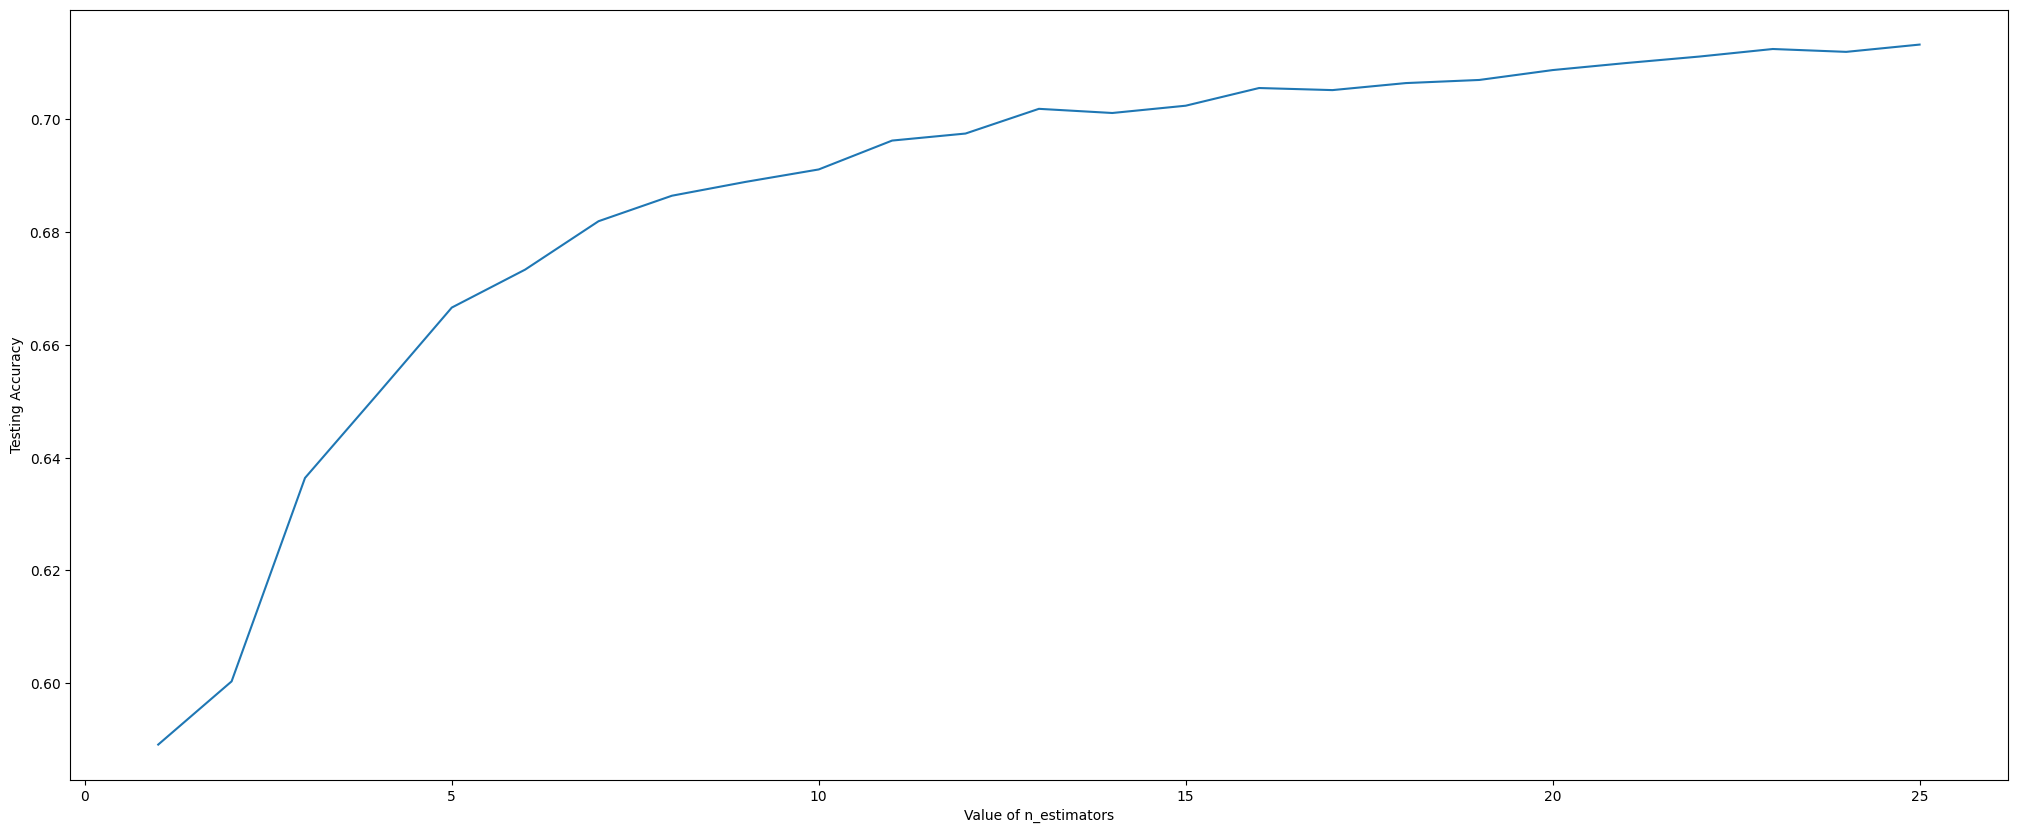

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=25
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/50 round completed......................... Accurecy: 0.3787285049098705
2/50 round completed......................... Accurecy: 0.37835968835000694
3/50 round completed......................... Accurecy: 0.4249227790327786
4/50 round completed......................... Accurecy: 0.48669955280992117
5/50 round completed......................... Accurecy: 0.5224747591166843
6/50 round completed......................... Accurecy: 0.5472315706975244
7/50 round completed......................... Accurecy: 0.5677930939099165
8/50 round completed......................... Accurecy: 0.5859573094831958
9/50 round completed......................... Accurecy: 0.6026923608870038
10/50 round completed......................... Accurecy: 0.6181826564012725
11/50 round completed......................... Accurecy: 0.6327509105158822
12/50 round completed......................... Accurecy: 0.6460283066709696
13/50 round completed......................... Accurecy: 0.659167396616108
14/50 round complete

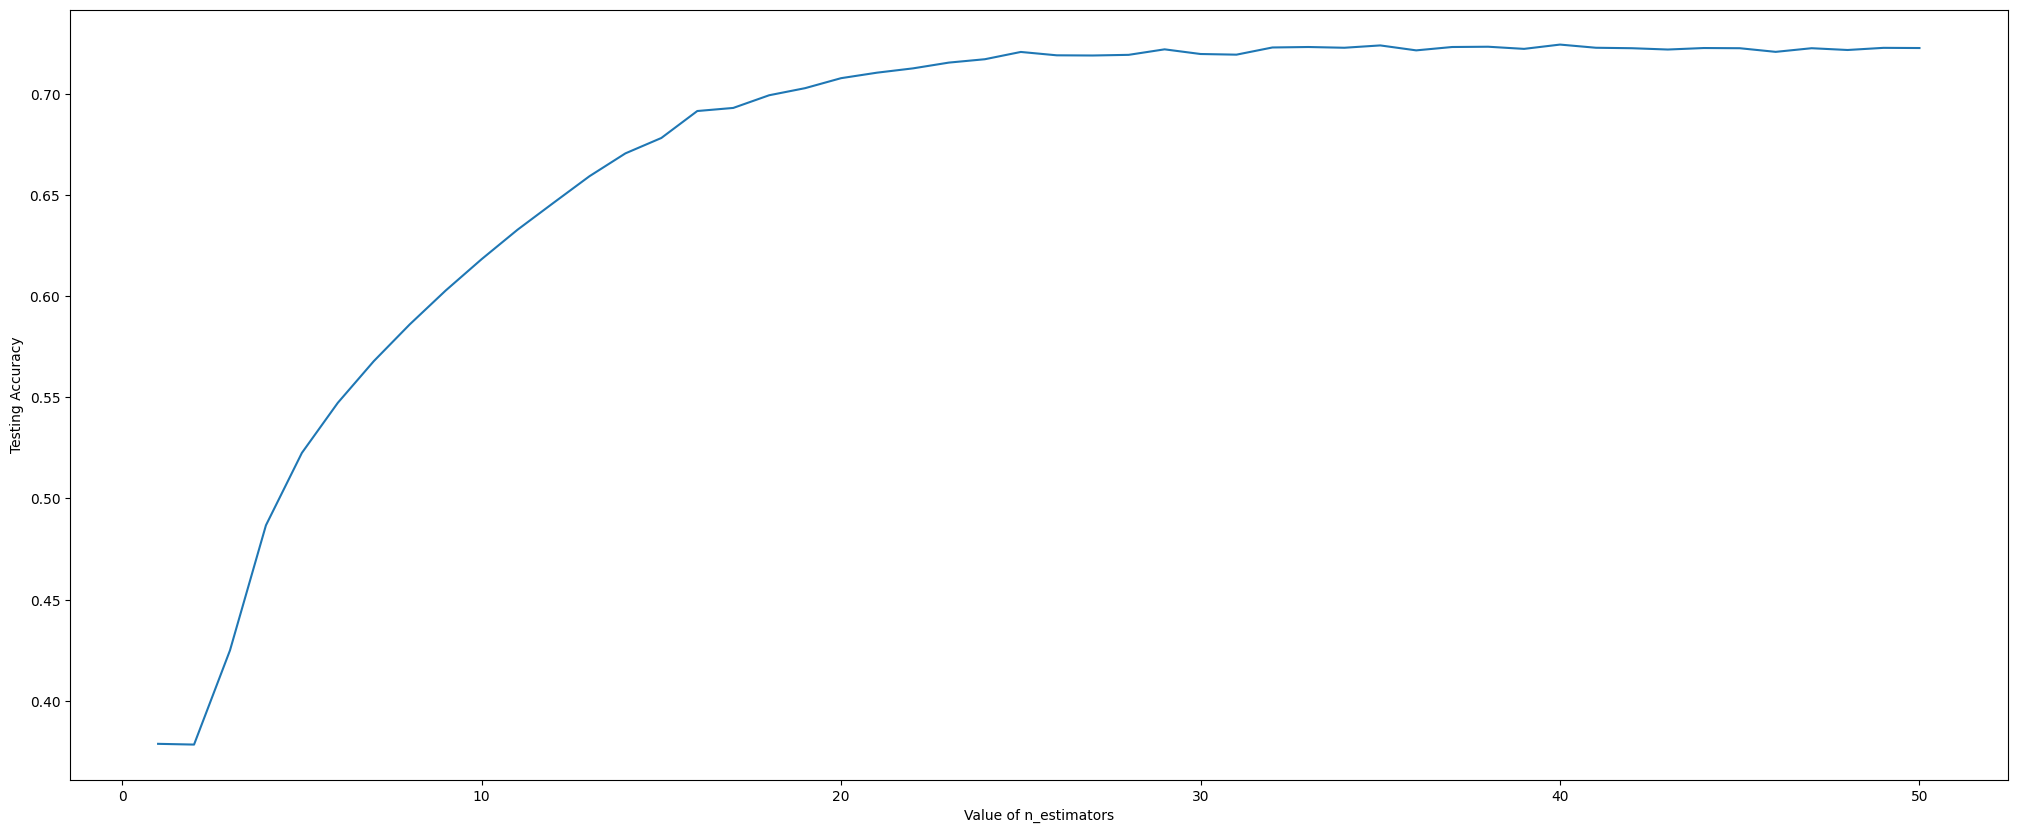

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[3448  693   81   43]
 [1170 6387 1544 1097]
 [  61  765 2412  163]
 [  35  409  160 3223]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      4265
           1       0.77      0.63      0.69     10198
           2       0.57      0.71      0.63      3401
           3       0.71      0.84      0.77      3827

    accuracy                           0.71     21691
   macro avg       0.70      0.75      0.72     21691
weighted avg       0.72      0.71      0.71     21691

Accurecy:  0.7131990226361163


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[3454  694   76   41]
 [1099 6478 1486 1135]
 [  50  684 2490  177]
 [  39  365  136 3287]]
              precision    recall  f1-score   support

           0       0.74      0.81      0.78      4265
           1       0.79      0.64      0.70     10198
           2       0.59      0.73      0.66      3401
           3       0.71      0.86      0.78      3827

    accuracy                           0.72     21691
   macro avg       0.71      0.76      0.73     21691
weighted avg       0.73      0.72      0.72     21691

Accurecy:  0.7242174173620396


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[3452  698   76   39]
 [1183 6385 1539 1091]
 [  59  771 2393  178]
 [  44  396  154 3233]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      4265
           1       0.77      0.63      0.69     10198
           2       0.57      0.70      0.63      3401
           3       0.71      0.84      0.77      3827

    accuracy                           0.71     21691
   macro avg       0.70      0.75      0.72     21691
weighted avg       0.72      0.71      0.71     21691

Accurecy:  0.7128763081462358


#XGB

In [ ]:


import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train.values,y_train.values)
y_pred = xgb_deafult.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

AttributeError: ignored



---



---



#Result

In [ ]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()


In [ ]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


In [ ]:
print("best_models:")
for i in best_models:
  print(i)


In [ ]:
len(best_models)

#Performance parameter for each class

In [ ]:

def confusion_details(y_test,y_pred):
    labels = list(set(y_test))
    labels.sort()

    print("Total labels: %s -> %s" % (len(labels), labels))

    df = pd.DataFrame(
        data=confusion_matrix(y_test, y_pred, labels=labels),
        columns=labels,
        index=labels
    )

    print(df)

    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Local (metrics per class)
    #
    tps = {}
    fps = {}
    fns = {}
    tns = {}

    precision_local = {}
    recall_local = {}
    f1_local = {}
    accuracy_local = {}
    specificity_local={}

    for label in labels:
        tps[label] = df.loc[label, label]
        fps[label] = df[label].sum() - tps[label]
        fns[label] = df.loc[label].sum() - tps[label]
        tns[label]=len(y_test) - (tps[label] + fps[label] + fns[label])

        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]

        precision_local[label] = tp / (tp + fp) if (tp + fp) > 0. else 0.
        specificity_local[label] = tn / (tn + fp) if (tn + fp) > 0. else 0.
        recall_local[label] = tp / (tp + fn) if (tp + fp) > 0. else 0.
        p, r = precision_local[label], recall_local[label]

        f1_local[label] = 2. * p * r / (p + r) if (p + r) > 0. else 0.
        accuracy_local[label] = tp / (tp + fp + fn) if (tp + fp + fn) > 0. else 0.



    print("#-- Local measures --#")
    print("True Positives(TP):", tps)
    print("False Positives(FP):", fps)
    print("True Negatives(TN):", tns)
    print("False Negatives(FN):", fns)
    print("----------------------------")

    print("Precision:", precision_local)
    print("Recall/Sensitivity:", recall_local)
    print("Specificity:",specificity_local)
    print("F1-Score:", f1_local)
    print("Accuracy:", accuracy_local)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Global
    #
    micro_averages = {}
    macro_averages = {}

    correct_predictions = sum(tps.values())
    true_negative=sum(tns.values())

    den = sum(list(tps.values()) + list(fps.values()))
    micro_averages["Precision"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tps.values()) + list(fns.values()))
    micro_averages["Recall"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tns.values()) + list(fps.values()))
    micro_averages["Specificity"] = 1. * true_negative / den if den > 0. else 0.


    micro_avg_p, micro_avg_r = micro_averages["Precision"], micro_averages["Recall"]
    micro_averages["F1-score"] = 2. * micro_avg_p * micro_avg_r / (micro_avg_p + micro_avg_r) if (micro_avg_p + micro_avg_r) > 0. else 0.

    macro_averages["Precision"] = np.mean(list(precision_local.values()))
    macro_averages["Recall"] = np.mean(list(recall_local.values()))
    macro_averages["Specificity"]=np.mean(list(specificity_local.values()))


    macro_avg_p, macro_avg_r = macro_averages["Precision"], macro_averages["Recall"]
    macro_averages["F1-Score"] = 2. * macro_avg_p * macro_avg_r / (macro_avg_p + macro_avg_r) if (macro_avg_p + macro_avg_r) > 0. else 0.

    total_predictions = df.values.sum()
    accuracy_global = correct_predictions / total_predictions if total_predictions > 0. else 0.

    print("#-- Global measures --#")
    print("Micro-Averages:", micro_averages)
    print("Macro-Averages:", macro_averages)
    print("Correct predictions:", correct_predictions)
    print("Total predictions:", total_predictions)
    print("Accuracy:", accuracy_global)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()



    accuracy_local_new = {}
    for label in labels:
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        accuracy_local_new[label] = (tp + tn) / (tp + fp + fn + tn) if (tp + fp + fn + tn) > 0. else 0.

    total_true = sum(list(tps.values()) + list(tns.values()))
    total_predictions = sum(list(tps.values()) + list(tns.values()) + list(fps.values()) + list(fns.values()))
    accuracy_global_new = 1. * total_true / total_predictions if total_predictions > 0. else 0.

    print("Accuracy (per class), with TNs:", accuracy_local_new)
    print("Accuracy (per class), without TNs:", accuracy_local)
    print("Accuracy (global), with TNs:", accuracy_global_new)
    print("Accuracy (global), without TNs:", accuracy_global)

In [ ]:
new_keys_10=models_check_box(models)

In [ ]:
for i in range(len(new_keys_10)):
  if new_keys_10[i].value ==True:
    print("\n")
    print("_________________________________________________",models[i],"_______________________________________________")

    if str(models[i])[:3] == "XGB":
      y_pred = models[i].predict(X_test.values)
      confusion_details(y_test,y_pred)

    else:
      y_pred = models[i].predict(X_test)
      confusion_details(y_test,y_pred)
    print('\n')
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print('\n')
    print('\n')

#Testing Accuracy For Best 4 Models

In [ ]:

for i in best_models:
  print("--------------------------------------------------")
  print()
  if str(i[0])[:3] == "XGB":
    y_pred=i[0].predict(X_test.values)
  else:
    y_pred=i[0].predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test,y_pred))
  print("Accurecy: ",accuracy_score(y_test, y_pred))

#SHAP

In [ ]:
!pip install shap
import shap

In [ ]:

def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_test)

  shap_values1 = explainer(X_test)
  features_names=list_of_feat

  if 'Subjects' in features_names:
    features_names.pop(0)


  shap.plots.bar(shap_values1,max_display=graph_feat["max_display"])

  print("---------------------")

  shap.summary_plot(shap_values1,max_display=graph_feat["max_display"],feature_names=features_names)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


  print("---------------------")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])

In [ ]:
new_keys_7=models_check_box(models)

In [ ]:
graph_feat={
    "max_display":20,
    "shap_values Index":2
}

for i in range(len(new_keys_7)):
  if new_keys_7[i].value ==True:
    SHAP_EXP(models[i],graph_feat)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Confusion Matrix For Testing

In [ ]:
def Conf_Mat(X_,y_,attb,keys):

  import matplotlib.pyplot as plt
  from yellowbrick.classifier import ConfusionMatrix
  import matplotlib.dates as dates

  fig = plt.figure(figsize=(attb["Fig Height"],attb["Fig weidth"]))
  ax = fig.add_subplot(111)


  for i in range(len(keys)):
    if keys[i].value ==True:
      cm = ConfusionMatrix(models[i], classes=['Reading', 'Resting', 'Walking', 'Working'],fontsize=attb["Confusion Matrix Inner Fontsize"],ax=ax)

      if str(models[i])[:3] == "XGB":
        cm.fit(X_train.values, y_train.values)
        cm.score(X_.values, y_.values)
      else:
        cm.fit(X_train, y_train)
        cm.score(X_, y_)

      cm.ax.set_xlabel("Predicted Class", fontsize=attb["X Axis Fontsize"],fontweight="bold")
      cm.ax.set_ylabel("True Class", fontsize=attb["Y Axis Fontsize"],fontweight="bold")
      cm.ax.xaxis.set_tick_params(labelsize=attb["X Label Fontsize"])
      cm.ax.yaxis.set_tick_params(labelsize=attb["Y Label Fontsize"])
      for label in ax.get_xticklabels():
        label.set_fontweight(550)
      for label in ax.get_yticklabels():
        label.set_fontweight(550)

      plt.savefig(attb["type"]+"_Confusion_mat("+str(models[i])+").png")
      cm.show()
      print("--------------------")
      print("--------------------")

In [ ]:
new_keys_6=models_check_box(models)

In [ ]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10,

  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18,
  "type"  : "Testing"

}

Conf_Mat(X_test,y_test,attributes,new_keys_6)

#Confusion Matrix for Testing ( with Percent)

In [ ]:
def Conf_Mat_percent(X_,y_,attb,keys):

  import matplotlib.pyplot as plt
  from yellowbrick.classifier import ConfusionMatrix
  import matplotlib.dates as dates

  fig = plt.figure(figsize=(attb["Fig Height"],attb["Fig weidth"]))
  ax = fig.add_subplot(111)


  for i in range(len(keys)):
    if keys[i].value ==True:
      cm = ConfusionMatrix(models[i], classes=['Reading', 'Resting', 'Walking', 'Working'],fontsize=attb["Confusion Matrix Inner Fontsize"],ax=ax,percent=True)

      if str(models[i])[:3] == "XGB":
        cm.fit(X_train.values, y_train.values)
        cm.score(X_.values, y_.values)
      else:
        cm.fit(X_train, y_train)
        cm.score(X_, y_)

      cm.ax.set_xlabel("Predicted Class", fontsize=attb["X Axis Fontsize"],fontweight="bold")
      cm.ax.set_ylabel("True Class", fontsize=attb["Y Axis Fontsize"],fontweight="bold")
      cm.ax.xaxis.set_tick_params(labelsize=attb["X Label Fontsize"])
      cm.ax.yaxis.set_tick_params(labelsize=attb["Y Label Fontsize"])
      for label in ax.get_xticklabels():
        label.set_fontweight(550)
      for label in ax.get_yticklabels():
        label.set_fontweight(550)

      plt.savefig(attb["type"]+"_Confusion_mat("+str(models[i])+").png")
      cm.show()
      print("--------------------")
      print("--------------------")

In [ ]:
new_keys_20=models_check_box(models)

In [ ]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10,

  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18,
  "type"  : "Training"

}

Conf_Mat_percent(X_test,y_test,attributes,new_keys_20)

#Confusion Matrix For Training

In [ ]:
new_keys_5=models_check_box(models)

In [ ]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10,

  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18,
  "type"  : "Training"

}

Conf_Mat(X_train,y_train,attributes,new_keys_5)

#Confusion Matrix for Training ( with Percent)

In [ ]:
new_keys_21=models_check_box(models)

In [ ]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10,

  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18,
  "type"  : "Training"

}

Conf_Mat_percent(X_train,y_train,attributes,new_keys_21)

#ROC FOR MULTICLASS

In [ ]:
!pip install plotly==5.11.0
!pip install -U kaleido


import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

def ploty_ROC(model,X,y,fig_name,graph_attributes):

    lebel_dict={
    0: 'Reading',
    1: 'Resting',
    2: 'Walking',
    3: 'Working'
    }
    if str(model)[:3] == "XGB":
      y_scores = model.predict_proba(X.values)
    else:
      y_scores = model.predict_proba(X)
    #y_scores = model.predict_proba(X)

    y_onehot = pd.get_dummies(y, columns=model.classes_)

    fig = go.Figure()
    fig.add_shape(
        type='line', line=dict(dash='dash', width=5),
        x0=0, x1=1, y0=0, y1=1
    )

    for i in range(y_scores.shape[1]):
        y_true = y_onehot.iloc[:, i]
        y_score = y_scores[:, i]

        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)
        name = f"{lebel_dict[y_onehot.columns[i]]} (AUC={auc_score:.2f})"
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

    fig.update_layout(
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=1000, height=1000,
        font=dict(
            family="Arial Black, monospace",
            size=graph_attributes["Font Size"],
            color=graph_attributes["Font Color"]
        ),
        legend=dict(
            x=0.62,
            y=0.05,
            traceorder="reversed",
            title_font_family="Arial Black",
            font=dict(
                family="Arial Black, monospace",
                size=graph_attributes["Legend Font Size"],
                color=graph_attributes["Legend Font Color"]
            ),
            bgcolor=graph_attributes["Legend bgcolor"],
            bordercolor=graph_attributes["Legend bordercolor"],
            borderwidth=graph_attributes["Legend borderwidth"]
        ),
        #plot_bgcolor="",
    )
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', tickfont_family="Arial Black")
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black',tickfont_family="Arial Black")

    fig.show()
    fig.write_image(fig_name+".png")

In [ ]:
new_keys_9=models_check_box(models)

In [ ]:

#Change the attriutes for graph
graph_attributes={
    "Font Size"  : 25,
    "Font Color" : "black",
    "Legend Font Size"  : 25,
    "Legend Font Color" : "black",
    "Legend bgcolor"    : "LightSteelBlue",
    "Legend bordercolor": "White",
    "Legend borderwidth": 1

}



for i in range(len(new_keys_9)):
  if new_keys_9[i].value ==True:
    print(models[i])
    fig1=ploty_ROC(models[i],X_train,y_train,str(models[i]),graph_attributes)
    fig2=ploty_ROC(models[i],X_test,y_test,str(models[i]),graph_attributes)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Cross_val_score function

In [ ]:
from sklearn.model_selection import cross_val_score

k=5
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  l=list(cross_val_score(i[0],X_new, y_new,cv=k))
  avg=sum(l)/k
  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print("--------------------------------------------------------------------------")

# **LIME**

In [ ]:
!pip install lime

In [ ]:

  def LIME_EXP(model,row):
    import lime
    from lime import lime_tabular


    if str(model)[:3] == "XGB":

      """explainer = lime.lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=list(list(X_new.columns)),
        class_names=['Reading', 'Resting', 'Walking', 'Working']
        )

      exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 model.predict_proba,
                                 num_features=6,
                                 top_labels=2)"""
      print("Plz RUN XGboost cell....")
      return None



    else:
      explainer = lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_train),
        feature_names=list(X_new.columns),
        class_names=['Reading', 'Resting', 'Walking', 'Working'],
        mode='classification'
        )

      exp = explainer.explain_instance(X_test.iloc[row],
                                      model.predict_proba,
                                      num_features=6,
                                      top_labels=4)



    exp.show_in_notebook(show_table=True, show_all=True)



    import matplotlib.pyplot as plt
    with plt.style.context("ggplot"):
        exp.as_pyplot_figure()


    from IPython.display import HTML
    html_data = exp.as_html()
    HTML(data=html_data)

    exp.save_to_file(str(model)+".html")

In [ ]:
row = int(input("Enter the index of row to explain: "))      # the index of row to be explained in LIME


new_keys_8=models_check_box(models)

In [ ]:
for i in range(len(new_keys_8)):
  if new_keys_8[i].value ==True:
    print(models[i])
    LIME_EXP(models[i],row)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

### LIME for XGboost

In [ ]:
row = 18  ## the index of row to be explained in LIME

import lime
from lime import lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=list(list(X_new.columns)),
                                                   class_names=['Reading', 'Resting', 'Walking', 'Working'])

####Default

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_deafult.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_deafult)+".html")

####Best Max Depth

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_depth.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_depth)+".html")

####Best N Estimator

In [ ]:


exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_estimator.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_estimator)+".html")

####Best Depth and Best Estimator

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_all.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)


import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_all)+".html")